# Module 09 - Thermodynamic Simulations - Ising Model 

# 17.1  Magnets via Metropolis Algorithm <a id="17.1"></a>

Ferromagnets contain finite-size *domains* in which the spins of all the
atoms point in the same direction. When an external magnetic field is
applied to these materials, the different domains align and the
materials become “magnetized.” Yet as the temperature is raised, the
total magnetism decreases, and at the Curie temperature the system goes
through a *phase transition* beyond which all magnetization vanishes.
Your **problem** is to explain the thermal behavior of ferromagnets.

## 17.2  An Ising Chain (Model) <a id="17.2"></a>

As our model we consider $N$ magnetic dipoles fixed in place on the
links of a linear chain (Figure 17.1). (It is a straightforward
generalization to handle 2-D and 3-D lattices.) Because the particles
are fixed, their positions and momenta are not dynamic variables, and we
need worry only about their spins. We assume that the particle at site
$i$ has spin $s_{i}$, which is either up or down:

$$\tag*{17.1} s_{i} \equiv s_{z,i} = \pm \frac{1}{2}.$$

Each configuration of the $N$ particles is described by a quantum state
vector

$$\tag*{17.2}
\left|alpha_{j}\right \rangle   = \left|s_{1}, s_{2}, \ldots ,
s_{N} \right \rangle = \left\{\pm\frac{1}{2},
  \pm\frac{1}{2},   \ldots \right\}, \quad
j=1,\ldots, 2^{N}.$$

Because the spin of each particle can assume any one of *two* values,
there are $2^{N}$ different possible states for the $N$ particles in the
system. Because fixed particles cannot be interchanged, we do not need
to concern ourselves with the symmetry of the wave function.

![image](Figs/Fig17_1.png)

**Figure 17.1** The 1-D lattice of $\textit{N}$ spins used in the Ising model of
magnetism. The interaction energy between nearest-neighbor pairs $\textit{E} =
\pm \textit{J}$ is shown for aligned and opposing spins.

The energy of the system arises from the interaction of the spins with
each other and with the external magnetic field $B$. We know from
quantum mechanics that an electron’s spin and magnetic moment are
proportional to each other, so a magnetic <span>*dipole-dipole*</span>
interaction is equivalent to a <span>*spin-spin*</span> interaction. We
assume that each dipole interacts with the external magnetic field and
with its nearest neighbor through the potential:

$$\tag*{17.3} V_{i} = - J\textbf{s}_{i}\cdot\textbf{s}_{i+1} - g \mu_b
\textbf{s}_{i}\cdot \textbf{B}.$$

Here the constant $J$ is called the *exchange energy* and is a measure
of the strength of the spin-spin interaction. The constant $g$ is the
gyromagnetic ratio, that is, the proportionality constant between a
particle’s angular momentum and magnetic moment. The constant
$\mu_b = e\hbar/(2m_ec)$ is the Bohr magneton, the basic measure for
magnetic moments.

Even for small numbers of particles, the $2^{N}$ possible spin
configurations gets to be very large ($2^{20} > 10^6$), and it is
expensive for the computer to examine them all. Realistic samples with
${\sim}10^{23}$ particles are beyond imagination. Consequently,
statistical approaches are usually assumed, even for moderate values of
$N$. Just how large $N$ must be for this to be accurate is one of the
things we want you to explore with your simulations.

The energy of this system in state $\alpha_k$ is the expectation value
of the sum of the potential $V$ over the spins of the particles:

$$\tag*{17.4} E_{\alpha_k} = \Big\langle \alpha_k \Big|sum_{i}V_{i}
\Big|alpha_k \Big\rangle = -J \sum_{i=1}^{N-1} s_{i}s_{i+1} - B
\mu_b\sum_{i=1}^{N} s_{i}.$$

An apparent paradox in the Ising model occurs when we turn off the
external magnetic field and thereby eliminate a preferred direction in
space.This means that the average magnetization should vanish despite
the fact that the lowest energy state would have all spins aligned. The
answer to this paradox is that the system with $B=0$ is unstable; even
if all the spins are aligned, there is nothing to stop their spontaneous
reversal. The instabilities are a type of Bloch-wall transitions in
which regions of different spin orientations change size. Indeed,
natural magnetic materials have multiple domains with all the spins
aligned, but with the different domains pointing in different
directions.

For simplicity we assume $B=0$, which means that there are just spin-spin
interactions. However, be cognizant of the fact that this means there is no
preferred direction in space, and so you may have to be careful how you
calculate observables when averaging over domains. For example, you may need
to take an absolute value of the total spin when calculating the magnetization,
that is, to calculate $\langle \left | \sum_i s_{i}\right|rangle$ rather than
$\langle \sum_i s_{i}\rangle$.

The equilibrium alignment of the spins depends critically on the sign of
the exchange energy $J$. If $J>0$, the lowest energy state will tend to
have neighboring spins aligned. If the temperature is low enough, the
ground state will be a *ferromagnet* with all the spins aligned. Yet if
$J<0$, the lowest energy state will tend to have neighbors with opposite
spins. If the temperature is low enough, the ground state will be a
*antiferromagnet* with alternating spins.

The simple 1-D Ising model has its limitations. Although the model is
accurate in describing a system in thermal equilibrium, it is not
accurate in describing the *approach* to thermal equilibrium. Second, we
have postulated that only one spin is flipped at a time, while real
magnetic materials tend to flip many spins at a time. Other limitations
are straightforward to improve, for example, the addition of
longer-range interactions than just nearest neighbors, the motion of the
centers, higher-multiplicity spin states, and extension to two and three
dimensions.

A fascinating aspect of magnetic materials is the existence of a
critical temperature, the *Curie temperature*, above which the gross
magnetization essentially vanishes. Below the Curie temperature the
system is in a quantum state with macroscopic order; above the Curie
temperature there is only short-range order extending over atomic
dimensions. Although the 1-D Ising model predicts realistic temperature
dependences for the thermodynamic quantities, the model is too simple to
support a phase transition. However, the 2-D and 3-D Ising models do
support the Curie temperature phase transition \[[Yang(52)](BiblioLinked.html#Yang)\].

## 17.3  Statistical Mechanics (Theory) <a id="17.3"></a>

Statistical mechanics starts with the elementary interactions among a
system’s particles and constructs the macroscopic thermodynamic
properties such as specific heats. The essential assumption is that all
configurations of the system consistent with the constraints are
possible. In some simulations, such as the molecular dynamics ones in
[Chapter 18, *Molecular Dynamics Simulations*](CP18.ipynb), the problem
is set up such that the *energy* of the system is fixed. The states of
this type of system are described by what is called a *microcanonical
ensemble*.In contrast, for the thermodynamic simulations we study in
this chapter, the temperature, volume, and number of particles remain
fixed, and so we have what is called a *canonical ensemble*.

When we say that an object is *at* temperature $T$, we mean that the
object’s atoms are in thermodynamic equilibrium with an average kinetic
energy proportional to $T$. Although this may be an equilibrium state,
it is also a dynamic one in which the object’s energy fluctuates as it
exchanges energy with its environment (it is thermo*dynamics* after
all). Indeed, one of the most illuminating aspects of the simulation to
follow its visualization of the continual and random interchange of
energy that occurs at equilibrium.

The energy $E_{\alpha_j}$ of state $\alpha_{j}$ in a canonical ensemble
is not constant but is distributed with probabilities $P(\alpha_{j})$
given by the Boltzmann distribution:

$$\tag*{17.5}
 {\cal P}(E_{\alpha_{j}},T)= \frac{e^{-E_{\alpha_j}/k_BT}}
{Z(T)},\quad Z(T)=
\sum_{\alpha_{j}}e^{-E_{\alpha_j}/k_BT}.$$

Here $k$ is Boltzmann’s constant, $T$ the temperature, and $Z(T)$ the
partition function, a weighted sum over the individual *states* or
*configurations* of the system. Another formulation, such as the
Wang-Landau algorithm discussed in § 17.5, sums over the *energies* of
the states of the system and includes a density-of-states factor
$g(E_i)$ to account for degenerate states with the same energy. While
the present sum over states is a simpler way to express the problem (one
less function), we shall see that the sum over energies is more
efficient numerically. In fact, we are even able to ignore the partition
function $Z(T)$ because it cancels out in our forming the *ratio* of
probabilities.

### 17.3.1  Analytic Solution<a id="17.3.1"></a>

For very large numbers of particles, the thermodynamic properties of the 1-D
Ising model can be solved analytically and yields \[Plischke & B. Bergersen(94)\]

$$\begin{align}
\tag*{17.6}
&\displaystyle U = \langle E \rangle &\\
 &\displaystyle  \frac{U}{J} = - N \tanh \frac{J}{k_BT} =
-N\frac{e^{J/k_BT} -e^{-J/k_BT}}{e^{J/k_BT}+e^{-J/k_BT}}   =
\begin{cases}
   N, &   k_BT\rightarrow 0 ,\\
   0, &   k_BT\rightarrow \infty .\end{cases}&\tag*{17.7}\end{align}$$

The analytic results for the specific heat per particle and the magnetization are

$$\begin{align}
\tag*{17.8}
C(k_BT) & = \frac{1}{N} \frac{dU}{dT}= \frac{(J/k_BT)^{2}} {\cosh^{2}(J/k_BT)} \\
M(k_BT) & = \frac{N e^{J/k_BT}\sinh (B/k_BT)}{
\sqrt{e^{2J/k_BT}\sinh^2(B/k_BT) + e^{-2J/k_BT}} } .\tag*{17.9}\end{align}$$

The **2-D Ising model** has an analytic solution, but it is not easy to derive it
\[Yang(52), Huang(87)\]. Whereas the internal energy and heat capacity are
expressed in terms of elliptic integrals, the spontaneous magnetization per
particle has the simple form 

$$\begin{align}
\tag*{17.10}
 {\cal M}(T) &=\begin{cases} 0, &  T>T_c\\
   \frac{(1+z^2)^{1/4}(1-6z^2+z^4)^{1/8}} {\sqrt{1-z^2}}, &   T<T_c
   ,\end{cases}\\
k T_c &\simeq 2.269185 J, \quad z= e^{-2J/k_BT},\tag*{17.11}\end{align}$$

where the temperature is measured in units of the Curie temperature $T_c$.

## 17.4  Metropolis Algorithm <a id="17.4"></a>

In trying to devise an algorithm that simulates thermal equilibrium, it
is important to understand that the Boltzmann distribution (17.5) does
not require a system to remain always in the state of lowest energy, but
says that it is less likely for the system to be found in a
higher-energy state than in a lower-energy one. Of course, as
$T \rightarrow 0$ only the lowest energy state will be populated. For
finite temperatures we expect the energy to fluctuate by approximately
$k_BT$ about the equilibrium value.

In their simulation of neutron transmission through matter, Metropolis,
Rosenbluth, Teller, and Teller \[[Metropolis et al.(53)](BiblioLinked.html#metrop)\] invented an
algorithm to improve the Monte Carlo calculation of averages. This
*Metropolis algorithm* is now a cornerstone of computational physics
because the sequence of configurations it produces (a *Markov chain*)
accurately simulates the fluctuations that occur during thermal
equilibrium. The algorithm randomly changes the individual spins such
that, on the average, the probability of a configuration occurring
follows a Boltzmann distribution. (We do not find the proof
illuminating.)

The Metropolis algorithm is a combination of the variance reduction
technique discussed in §5.19 and the von Neumann rejection technique
discussed in § 5.21. There we showed how to make Monte Carlo integration
more efficient by sampling random points predominantly where the
integrand is large and how to generate random points with an arbitrary
probability distribution. Now we would like to have spins flip randomly,
have a system that can reach any energy in a finite number of steps
(*ergodic* sampling), and have a distribution of energies described by a
Boltzmann distribution, yet have systems that equilibrate quickly enough
to compute in reasonable times.

The Metropolis algorithm is implemented via a number of steps. We start
with a fixed temperature and an initial spin configuration, and apply
the algorithm until a thermal equilibrium is reached (equilibration).
Continued application of the algorithm generates the statistical
fluctuations about equilibrium from which we deduce the thermodynamic
quantities such as the magnetization $M(T)$. Then the temperature is
changed, and the whole process is repeated in order to deduce the $T$
dependence of the thermodynamic quantities. The accuracy of the deduced
temperature dependences provides convincing evidence of the validity of
the algorithm. Because the $2^N$ possible configurations of $N$
particles can be a very large number, the amount of computer time needed
can be very long. Typically, a small number of iterations $\simeq\! 10N$
is adequate for equilibration.

The explicit steps of the Metropolis algorithm are:

1.  Start with an arbitrary spin configuration $\alpha_{k}=\{s_1,
    s_2, \ldots, s_N\}$.

2.  Generate a trial configuration $\alpha_{k+1}$ by

    -   picking a particle $i$ randomly and

    -   flipping its spin.\[*Note:* Large-scale, practical computations
        make a full sweep in which every spin is updated once, and then
        use this as the new trial configuration. This is found to be
        efficient and useful in removing some autocorrelations.\]

3.  Calculate the energy $E_{\alpha_{\text{tr}}}$ of the
    trial configuration.

4.  If $E_{\alpha_{\text{tr}}} \leq E_{\alpha_{k}}$, accept the trial by
    setting $\alpha_{k+1} = \alpha_{\text{tr}}$.

5.  If $E_{\alpha_{\text{tr}}} > E_{\alpha_{k}}$, accept with relative
    probability $ {\cal R} = \exp(-\Delta E/k_BT)$:

    -   Choose a uniform random number $0 \leq r_i \leq
           1$.\

    -   Set $\alpha_{k+1} = \begin{cases}
        \alpha_{\text{tr}}, & \mbox{if} \ \  {\cal R} \geq r_j  \ \
        \mbox{(accept)},\\
        \alpha_{k}, & \mbox{if}\ \  {\cal R} < r_j \ \
        \mbox{(reject)}.
        \end{cases}$

The heart of this algorithm is its generation of a random spin configuration
$\alpha_{j}$ (17.2) with probability 

$$\begin{align}
\tag*{17.12}
 {\cal P}(E_{\alpha_{j}},T) \propto e^{-
E_{\alpha_j}/k_BT}.\end{align}$$ 

The technique is a variation of von Neumann
rejection (stone throwing) in which a random *trial* configuration is either
accepted or rejected depending upon the value of the Boltzmann factor.
Explicitly, the ratio of probabilities for a trial configuration of energy $E_t$ to
that of an initial configuration of energy $E_i$ is

$$\tag*{17.13}
 {\cal R} = \frac{{\cal P}_{\text{tr}}} { {\cal P}_i}\ =
e^{-\Delta E/k_BT},\quad   \Delta E =
E_{\alpha_{\text{tr}}}-E_{\alpha_i}.$$

If the trial configuration has a lower energy ($\Delta E\le 0$), the
relative probability will be greater than 1 and we will accept the trial
configuration as the new initial configuration without further ado.
However, if the trial configuration has a higher energy
($\Delta E > 0$), we will not reject it out of hand, but instead accept
it with relative probability $  {\cal R} =
\exp(-\Delta E/k_BT) <1$. To accept a configuration with a probability,
we pick a uniform random number between $0$ and $1$, and if the
probability is greater than this number, we accept the trial
configuration; if the probability is smaller than the chosen random
number, we reject it. (You can remember which way this goes by letting
$E_{\alpha_{\text{tr}}}\rightarrow \infty$, in which case $
 {\cal P} \rightarrow 0$ and nothing is accepted.) When the trial
configuration is rejected, the next configuration is identical to the
preceding one.

![image](Figs/Fig17_2.png)

**Figure 17.2** An Ising model simulation on a 1-D lattice of 100 initially
aligned spins (on the left). Up spins are indicated by circles, and down spins by
blank spaces. Although the system starts with all up spins (a “cold” start), the
system is seen to form domains of up and down spins as time progresses.

How do you start? One possibility is to start with random values of the
spins (a “hot” start). Another possibility (Figure 17.2) is a “cold”
start in which you start with all spins parallel ($J>0$) or antiparallel
($J<0$). In general, one tries to remove the importance of the starting
configuration by letting the calculation run a while (${\simeq}10N$
rearrangements) before calculating the equilibrium thermodynamic
quantities. You should get similar results for hot, cold, or arbitrary
starts, and by taking their average you remove some of the statistical
fluctuations.

### 17.4.1  Metropolis Algorithm Implementation<a id="17.4.1"></a>

1.  Write a program that implements the Metropolis algorithm, that is,
    that produces a new configuration $\alpha_{k+1}$ from the present
    configuration $\alpha_{k}$.

2.  Make the key data structure in your program an array `s[N]`
    containing the values of the spins $s_{i}$. For debugging, print out
    $+$ and $-$ to give the spin at each lattice point and examine the
    pattern for different trial numbers.

3.  The value for the exchange energy $J$ fixes the energy scale. Keep
    it fixed at $J=1$. (You may also wish to study antiferromagnets with
    $J=-1$, but first examine ferromagnets whose domains are easier
    to understand.)

4.  The thermal energy $k_BT$ is in units of $J$ and is the
    independent variable. Use $k_BT=1$ for debugging.

5.  Use periodic boundary conditions on your chain to minimize
    end effects. This means that the chain is a circle with the first
    and last spins adjacent to each other.

6.  Try $N \simeq 20$ for debugging, and larger values for
    production runs.

7.  Use the printout to check that the system equilibrates for

    -   a totally ordered initial configuration (cold start); your
        simulation should resemble Figure 17.2.

    -   a random initial configuration (hot start).

### 17.4.2  Equilibration, Thermodynamic Properties (Assessment)<a id="17.4.2"></a>

1.  Watch a chain of $N$ atoms attain thermal equilibrium when in
    contact with a heat bath. At high temperatures, or for small numbers
    of atoms, you should see large fluctuations, while at lower
    temperatures you should see smaller fluctuations.

2.  Look for evidence of instabilities in which there is a spontaneous
    flipping of a large number of spins. This becomes more likely for
    larger $k_BT$ values.

3.  Note how at thermal equilibrium the system is still quite dynamic,
    with spins flipping all the time. It is this energy exchange that
    determines the thermodynamic properties.

4.  You may well find that simulations at small $k_BT$ (say,
    $k_BT \simeq
    0.1$ for $N=200$) are slow to equilibrate. Higher $k_BT$ values
    equilibrate faster yet have larger fluctuations.

5.  Observe the formation of domains and the effect they have on the
    total energy. Regardless of the direction of spin within a domain,
    the atom-atom interactions are attractive and so contribute negative
    amounts to the energy of the system when aligned. However, the
    $\uparrow\downarrow$ or $\downarrow\uparrow$ interactions between
    domains contribute positive energy. Therefore you should expect a
    more negative energy at lower temperatures where there are larger
    and fewer domains.

6.  Make a graph of average domain size
    <span>*versus*</span> temperature.

**Thermodynamic Properties:** For a given spin configuration $\alpha_j$,
the energy and magnetization are given by

$$\tag*{17.14} E_{\alpha_j} = - J\sum_{i=1} ^{N-1} s_{i}s_{i+1},\quad {\cal M}_{j}
= \sum_{i=1}^{N} s_{i}.$$

The internal energy $U(T)$ is just the average value of the energy,

$$\tag*{17.15} U(T) = \langle E \rangle,$$

where the average is taken over a system in equilibrium. At high
temperatures we expect a random assortment of spins and so a vanishing
magnetization. At low temperatures when all the spins are aligned, we
expect ${\cal M}$ to approach $N/2$. Although the specific heat can be
computed from the elementary definition,

$$\tag*{17.16} C = \frac{1}{N} \frac{dU}{dT},$$

the numerical differentiation may be inaccurate because $U$ has
statistical fluctuations. A better way to calculate the specific heat is
to first calculate the fluctuations in energy occurring during $M$
trials and then determine the specific heat from the fluctuations:

$$\begin{align}
\tag*{17.17}
U_{2} & = \frac{1} {M} \sum_{t=1}^{M} (E_{t} )^{2},\\ 
C & = \frac{1}{N^2}\frac{U_{2} - (U)^{2}}{k_BT^{2}} =
\frac{1}{N^2} \frac{\langle E^2 \rangle-\langle E \rangle^2}
{k_BT^2}.\tag*{17.18}\end{align}$$

![image](Figs/Fig17_3.png)

**Figure 17.3** Simulation results from a     1-D Ising model of 100 spins. *Top:* energy and specific heat as
    functions of temperature; *Bottom:* magnetization as a function    of temperature.

1.  Extend your program to calculate the internal energy $U$ and the
    magnetization ${\cal M}$ for the chain. Do not recalculate entire
    sums when only one spin changes.

2.  Make sure to wait for your system to equilibrate before you
    calculate thermodynamic quantities. (You can check that $U$ is
    fluctuating about its average.) Your results should resemble
    Figure 17.3.

3.  Reduce statistical fluctuations by running the simulation a number
    of times with different seeds and taking the average of the results.

4.  The simulations you run for small $N$ may be realistic but may not
    agree with statistical mechanics, which assumes $N\simeq \infty$
    (you may assume that $N\simeq 2000$ is close to infinity). Check
    that agreement with the analytic results for the thermodynamic limit
    is better for large $N$ than small $N$.

5.  Check that the simulated thermodynamic quantities are independent of
    initial conditions (within statistical uncertainties). In practice,
    your cold and hot start results should agree.

6.  Make a plot of the internal energy $U$ as a function of $k_BT$ and
    compare it to the analytic result (17.56).

7.  Make a plot of the magnetization ${\cal M}$ as a function of $k_BT$
    and compare it to the analytic result. Does this agree with how you
    expect a heated magnet to behave?

8.  Compute the energy fluctuations $U_{2}$ (17.17) and the specific
    heat $C$ (17.18). Compare the simulated specific heat to the
    analytic result (17.8).



# Detailed assignment's steps

### Define functions

    3. Function to calculate the energy of a given configuration
    2. Function to flip one spin of the configuration at random
    1. Function to generate an initial configuration for the spin chain
    4. Function to perform the Metropolis algorithm at temperature T, save energy and magnetization for each run
    
## Perform the following calculations:

In [24]:
import numpy as np 
import scipy as sp
import random
def init_conf(n):
    conf=np.ones(n)
    return conf
    print(conf)
    


In [25]:
def energ(conf,B):
    J=1
    energ=np.dot(conf,np.roll(conf,-1))*-.5
    EB=-B*sum(conf)
    tot_energ=EB+energ
    return tot_energ




In [26]:
def flip(conf0,n):
    rm=random.randrange(0,n-1)
    conf1=conf0.copy()
    conf1[rm]=conf0[rm]*-1
    return conf1


In [27]:
def mag(conf):
    return sum(conf)*.5

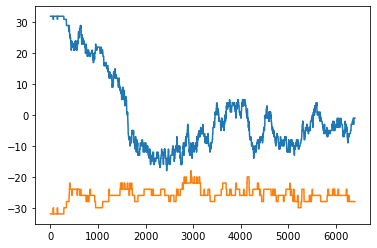

In [28]:
import matplotlib.pyplot as plt

def metropolis(n,s,kbt,b):
    conf0=init_conf(n)
    energies=np.zeros(s)
    conf=[]
    conf.append(conf0.copy())
    energy=[]
    energ0=energ(conf0,b)
    energy.append(energ0)
    mag0=mag(conf0)
    magnets=[]
    magnets.append(mag0)
    for i in range(s):
        energ0=energ(conf0,b)
        conf1=flip(conf0,n)
        energ1=energ(conf1,b)
        if energ1 < energ0:
            conf0=conf1.copy()
            conf.append(conf0.copy())
            energ0=energ1
            energy.append(energ0)
            mag0=mag(conf0)
            magnets.append(mag0)

        elif np.exp(-(energ1-energ0)/kbt) >= random.random():
            conf0=conf1.copy()
            conf.append(conf0.copy())
            energ0=energ1
            energy.append(energ0)
            mag0=mag(conf0)
            magnets.append(mag0)
        else:
            energy.append(energ0)
            conf.append(conf0.copy())
            mag0=mag(conf0)
            magnets.append(mag0)
    return(conf,energy,magnets)

n=64
s=100*n
kbt=.5
b=0
conf,energy,magnets=metropolis(n,s,kbt,b)
ns=list(range(1,s+2))
plt.plot(ns,magnets)
plt.plot(ns,energy)
rows=int(len(conf))
conf=np.array(conf)

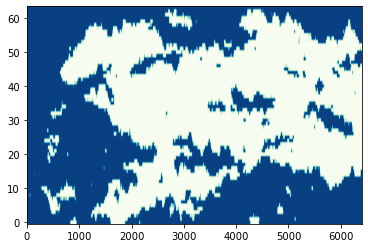

In [29]:
plt.imshow(conf.T,cmap='GnBu',aspect='auto',origin='lower')

### Single temperature run

    1. Chose various values of kbT (from 0.1 to 4), J=1.0 and B=0.0
    2. Start form a ferromagnetic configuration 
    3. Chose a chain of 100 spins and run for at least 10000 steps (100*N)

Check the equilibration of your variables over time, plot energy and magnetization vs. time

Plot the evolution of the configuration of the spin chain over time (you might want to look into matplotlib function 'imshow') to priduce an image similar to 17.2 above

In [30]:
def temp_step(temp_steps,cutoff,t1,t2,n,s): 
    avg_energy=[]
    avg_mag=[]
    Cv=[]
    for kbt in np.linspace(t1,t2,temp_steps):
        conf,energy,magnets=metropolis(n,s,kbt)
        energ0=sum(energy[cutoff:s])/(s-cutoff)
        mag0=sum(magnets[cutoff:s])/(s-cutoff)
        avg_energy.append(energ0)
        avg_mag.append(mag0)
        u2=1/(s-cutoff)*np.sum(np.array(energy[cutoff:s])**2)
        C=(1/n**2)*(u2-energ0**2)/(kbt**2)
        Cv.append(C)
    return avg_energy,avg_mag,Cv
        
    


In [31]:
temp_steps=40; cutoff=1500; t1=0.1; t2=4; s=10000; n=100
avg_energy,avg_mag,Cv=temp_step(temp_steps,cutoff,t1,t2,n,s)


TypeError: metropolis() missing 1 required positional argument: 'b'

In [ ]:

xz=np.linspace(t1,t2,temp_steps)
#plt.plot(xz,avg_mag)
plt.plot(xz,Cv)


### Termodynamic variables: E, M and Cv as function of temperature

    1. Choose a list of temperatures between 0.1 and 4 (at least 40 values)
    2. Start from a ferromagnetic configuration
    3. Chose a chain of 100 spins and run for at least 10000 steps (100*N) for each temperature
    4. For each run save the average energy and magnetization after the equilibration interval
    5. Plot average energy, average magnetization and average specific heat as function of temperature: verify 
    the prediction of the analitic solution (transition at ~1) - reproduce figure 17.3.

In [ ]:
def mag_field(b_steps,cutoff,b1,b2,n,s): 
    avg_energy=[]
    avg_mag=[]
    for b in np.linspace(b1,b2,b_steps):
        conf,energy,magnets=metropolis(n,s,kbt,b)
        energ0=sum(energy[cutoff:s])/(s-cutoff)
        mag0=sum(magnets[cutoff:s])/(s-cutoff)
        avg_energy.append(energ0)
        avg_mag.append(mag0)
    return avg_energy,avg_mag

In [ ]:
b_steps=40; cutoff=1500; b1=-2; b2=2; s=10000; n=100
avg_energy,avg_mag=mag_field(b_steps,cutoff,b1,b2,n,s)

In [ ]:
plt.plot(np.linspace(-2,2,40),np.array(avg_mag)/(n/2))

### Termodynamic variables: M as function of magnetic field

    1. Choose a list of magnetic fields between -2.0 and 2.0 (at least 20 values)
    2. Start from a random configuration
    3. Chose a chain of 100 spins and run for at least 10000 steps (100*N) for T=1.5
    4. For each run save the average magnetization after the equilibration interval
    5. Plot average magnetization as function of magnetic field: verify 
    the prediction of the analitic solution (inversion of magnetization)
    6. Explore how the results change with temperature (range 1 to 10)
    7. For T=1.5 explore how the results change with the length of the spin chain (3,5,25,50,100)

In [40]:
import numpy as np 
import scipy as sp
import random
def init_conf(n):
    conf=np.ones((n,n))
    return conf


In [52]:
def energ(conf,B):
    J=1
    energ_x=sum(np.dot(conf,np.roll(conf,-1,axis=0))*-.5)
    energ_y=sum(np.dot(conf,np.roll(conf,1,axis=1))*-.5)
    print(energ_x)
    print(energ_y)
    tot=energ_x+energ_y
    EB=-B*sum(conf)
    tot_energ=EB+tot
    return tot_energ

n=10
conf=init_conf(n)
tot_energ=energ(conf,0)


[-50. -50. -50. -50. -50. -50. -50. -50. -50. -50.]
[-50. -50. -50. -50. -50. -50. -50. -50. -50. -50.]
